In [11]:
import coco_text
COCO_DATA='/home/sravya/data/muse/coco/coco2014/'
ct = coco_text.COCO_Text(COCO_DATA+ 'COCO_Text.json')

loading annotations into memory...
0:00:01.357921
creating index...
index created!


In [12]:
train_img_ids = ct.getImgIds(imgIds=ct.train)
valid_img_ids = ct.getImgIds(imgIds=ct.val)
test_img_ids = ct.getImgIds(imgIds=ct.test)

# Initial exploration

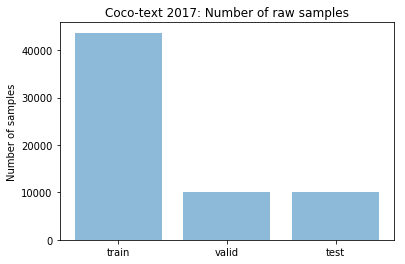

In [14]:
import matplotlib.pyplot as plt
import numpy as np
objects = ('train', 'valid', 'test')
y_pos = np.arange(len(objects))
num_samples = [len(train_img_ids), len(valid_img_ids), len(test_img_ids)]
 
plt.bar(y_pos, num_samples, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Number of samples')
plt.title('Coco-text 2017: Number of raw samples')
 
plt.show()

In [15]:
ct.cats

{'class': {'1': {'id': 1, 'name': 'machine printed'},
  '2': {'id': 2, 'name': 'handwritten'},
  '3': {'id': 3, 'name': 'others'}},
 'legibility': {'1': {'id': 1, 'name': 'legible'},
  '2': {'id': 2, 'name': 'illegible'}},
 'script': {'1': {'id': 1, 'name': 'english'},
  '2': {'id': 2, 'name': 'not english'},
  '3': {'id': 3, 'name': 'na'}}}

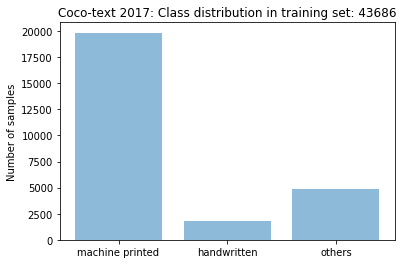

In [16]:
train_machine_printed = ct.getImgIds(imgIds=ct.train, catIds=[('class', 'machine printed')])
train_handwritten = ct.getImgIds(imgIds=ct.train, catIds=[('class', 'handwritten')])
train_class_other = ct.getImgIds(imgIds=ct.train, catIds=[('class', 'others')])

objects = ('machine printed', 'handwritten', 'others')
y_pos = np.arange(len(objects))
num_samples = [len(train_machine_printed), len(train_handwritten), len(train_class_other)]
 
plt.bar(y_pos, num_samples, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Number of samples')
plt.title('Coco-text 2017: Class distribution in training set: ' + str(len(train_img_ids)))
 
plt.show()

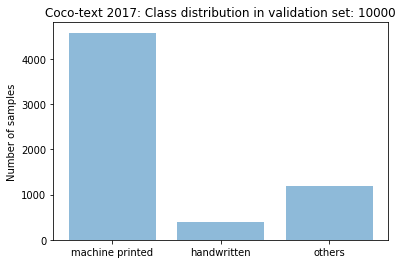

In [17]:
valid_machine_printed = ct.getImgIds(imgIds=ct.val, catIds=[('class', 'machine printed')])
valid_handwritten = ct.getImgIds(imgIds=ct.val, catIds=[('class', 'handwritten')])
valid_class_other = ct.getImgIds(imgIds=ct.val, catIds=[('class', 'others')])

objects = ('machine printed', 'handwritten', 'others')
y_pos = np.arange(len(objects))
num_samples = [len(valid_machine_printed), len(valid_handwritten), len(valid_class_other)]
 
plt.bar(y_pos, num_samples, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Number of samples')
plt.title('Coco-text 2017: Class distribution in validation set: '+ str(len(valid_img_ids)))
 
plt.show()

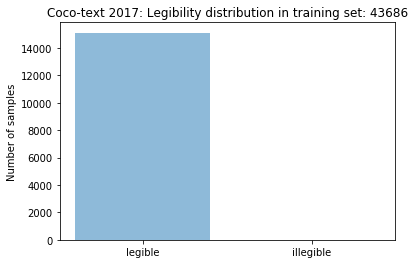

In [18]:
train_legible = ct.getImgIds(imgIds=ct.train, catIds=[('legibility', 'legible')])
train_non_legible = ct.getImgIds(imgIds=ct.train, catIds=[('class', 'illegible')])

objects = ('legible', 'illegible')
y_pos = np.arange(len(objects))
num_samples = [len(train_legible), len(train_non_legible)]
 
plt.bar(y_pos, num_samples, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Number of samples')
plt.title('Coco-text 2017: Legibility distribution in training set: '+ str(len(train_img_ids)))
 
plt.show()

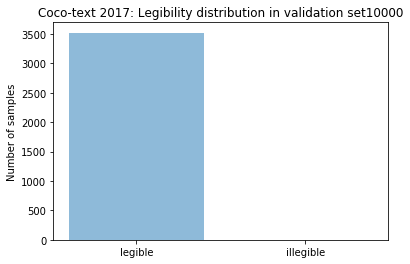

In [19]:
valid_legible = ct.getImgIds(imgIds=ct.val, catIds=[('legibility', 'legible')])
valid_non_legible = ct.getImgIds(imgIds=ct.val, catIds=[('class', 'illegible')])

objects = ('legible', 'illegible')
y_pos = np.arange(len(objects))
num_samples = [len(valid_legible), len(valid_non_legible)]
 
plt.bar(y_pos, num_samples, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Number of samples')
plt.title('Coco-text 2017: Legibility distribution in validation set' + str(len(valid_img_ids)))
 
plt.show()

# Check images are coming from the correct split

In [20]:
train_imgs = ct.loadImgs(train_img_ids)
valid_imgs = ct.loadImgs(valid_img_ids)

In [22]:
bad_example =0
for img in train_imgs:
    if 'train' not in img['file_name']:
        bad_example +=1

In [23]:
bad_example

0

In [24]:
valid_imgs[0]

{'file_name': 'COCO_train2014_000000229378.jpg',
 'height': 640,
 'id': 229378,
 'set': 'val',
 'width': 480}

In [25]:
bad_example =0
for img in valid_imgs:
    if 'valid' not in img['file_name']:
        bad_example +=1

In [26]:
bad_example 
#NOTE: All valdiation examples are in train set/folder
#Coco-text 2017 json has names of 2014 files
# 2017 files do not have COCO_train2014_ prefix

10000

# Get annotations

In [27]:
train_ann_ids = ct.getAnnIds(train_img_ids)
valid_ann_ids = ct.getAnnIds(valid_img_ids)

In [28]:
len(train_ann_ids)

118309

In [29]:
train_anns = ct.loadAnns(train_ann_ids)
train_anns

[{'area': 483.00972099482505,
  'bbox': [371.0561688026685,
   271.3129176879197,
   25.168539325842758,
   19.191011235955056],
  'class': 'others',
  'id': 1193735,
  'image_id': 262145,
  'language': 'na',
  'legibility': 'illegible',
  'polygon': [371.0561688026685,
   271.3129176879197,
   396.2247081285112,
   271.3129176879197,
   396.2247081285112,
   290.50392892387475,
   371.0561688026685,
   290.50392892387475]},
 {'area': 1708,
  'bbox': [507, 411, 122, 14],
  'class': 'machine printed',
  'id': 1010302,
  'image_id': 131084,
  'language': 'english',
  'legibility': 'legible',
  'polygon': [507, 411, 629, 411, 629, 425, 507, 425],
  'utf8_string': 'photography'},
 {'area': 1247.839051280309,
  'bbox': [410.46305084228516,
   411.90411710739136,
   95.28483581542969,
   13.095882892608643],
  'class': 'machine printed',
  'id': 1010303,
  'image_id': 131084,
  'language': 'english',
  'legibility': 'legible',
  'polygon': [410.46305084228516,
   411.90411710739136,
   505.7

# Make sure there is no overlap between training and validation sets

In [30]:
set(train_img_ids).intersection(valid_img_ids)

set()

# Understand bounding box values

In [57]:
test_ann = train_anns[1]
test_img = ct.loadImgs(test_ann['image_id'])

In [65]:
test_anns = train_anns[1:10]

In [67]:
test_imgs = ct.loadImgs([test_ann['image_id'] for test_ann in test_anns])

In [69]:
[test_img['file_name'] for test_img in test_imgs]

['COCO_train2014_000000131084.jpg',
 'COCO_train2014_000000131084.jpg',
 'COCO_train2014_000000524311.jpg',
 'COCO_train2014_000000393241.jpg',
 'COCO_train2014_000000393241.jpg',
 'COCO_train2014_000000524314.jpg',
 'COCO_train2014_000000524314.jpg',
 'COCO_train2014_000000524314.jpg',
 'COCO_train2014_000000524314.jpg']

In [64]:
path = '{}{}/'.format(COCO_DATA, 'train2014')    
filename = test_img[0]['file_name']
filename

'COCO_train2014_000000131084.jpg'

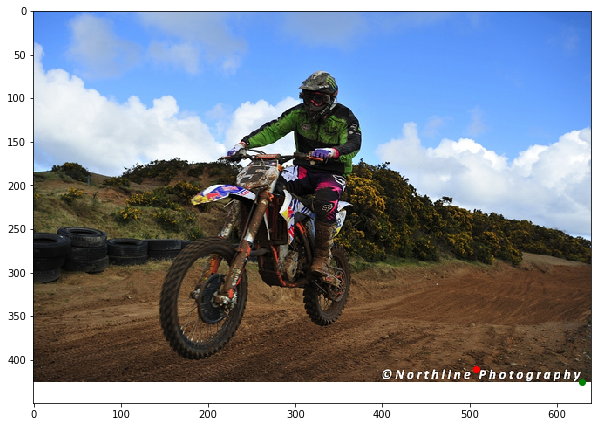

In [59]:
%matplotlib inline
from PIL import Image
import matplotlib.pyplot as plt
import pylab
pylab.rcParams['figure.figsize'] = (10.0, 8.0)
plt.figure()
plt.imshow(Image.open(path + filename))
xmin = test_ann['bbox'][0]
ymin = test_ann['bbox'][1]
b_width = test_ann['bbox'][2]
b_height = test_ann['bbox'][3]
xmax = xmin + b_width
ymax = ymin + b_height
xs = [xmin, xmax]
ys = [ymin, ymax]
vcol = ['r','g']
for j in [0,1]:
    plt.scatter(xs[j],ys[j], color=vcol[j])

# Visualize bounding boxes using coco-text helper

In [62]:
test_ann

{'area': 1708,
 'bbox': [507, 411, 122, 14],
 'class': 'machine printed',
 'id': 1010302,
 'image_id': 131084,
 'language': 'english',
 'legibility': 'legible',
 'polygon': [507, 411, 629, 411, 629, 425, 507, 425],
 'utf8_string': 'photography'}

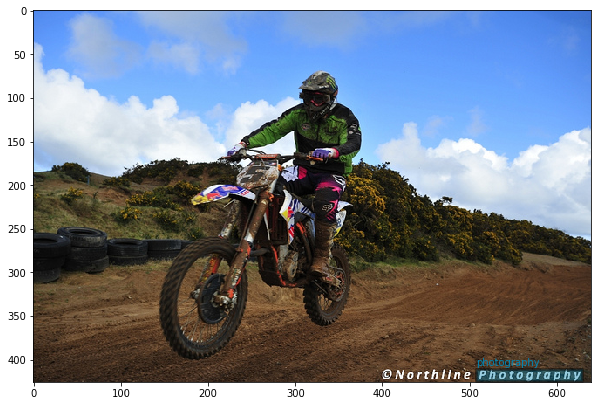

In [63]:
%matplotlib inline
import matplotlib.pyplot as plt
import pylab
pylab.rcParams['figure.figsize'] = (10.0, 8.0)
plt.figure()
plt.imshow(Image.open(path + filename))
ct.showAnns([test_ann])